In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [52]:
# Load the data
df_tokenholders = pd.read_csv('token_terminal_data/daily_crv_token_holders.csv')
df_tvl = pd.read_csv('token_terminal_data/daily_tvl.csv')
df_price = pd.read_csv('token_terminal_data/daily_crv_price.csv')
df_trading_volume = pd.read_csv('token_terminal_data/daily_trading_volume_on_curve.csv')

# Convert the 'Date' column to datetime
df_tokenholders['Date'] = pd.to_datetime(df_tokenholders['Date'])
df_tvl['Date'] = pd.to_datetime(df_tvl['Date'])
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_trading_volume['Data'] = pd.to_datetime(df_trading_volume['Date'])

In [33]:
# Set the 'Date' column as the index
df_tokenholders.set_index('Date', inplace=True)
df_tvl.set_index('Date', inplace=True)
df_price.set_index('Date', inplace=True)

In [34]:
df_tokenholders['30D_MA'] = df_tokenholders['crv_token_holders'].rolling(window=30).mean()
df_tvl['30D_MA'] = df_tvl['tvl'].rolling(window=30).mean()
df_price['30D_MA'] = df_price['price'].rolling(window=30).mean()

In [35]:
df_tokenholders['60D_MA'] = df_tokenholders['crv_token_holders'].rolling(window=60).mean()
df_tvl['60D_MA'] = df_tvl['tvl'].rolling(window=60).mean()
df_price['60D_MA'] = df_price['price'].rolling(window=60).mean()

In [48]:
df_tokenholders['90D_MA'] = df_tokenholders['crv_token_holders'].rolling(window=90).mean()
df_tvl['90D_MA'] = df_tvl['tvl'].rolling(window=90).mean()
df_price['90D_MA'] = df_price['price'].rolling(window=90).mean()

### CRV Holders

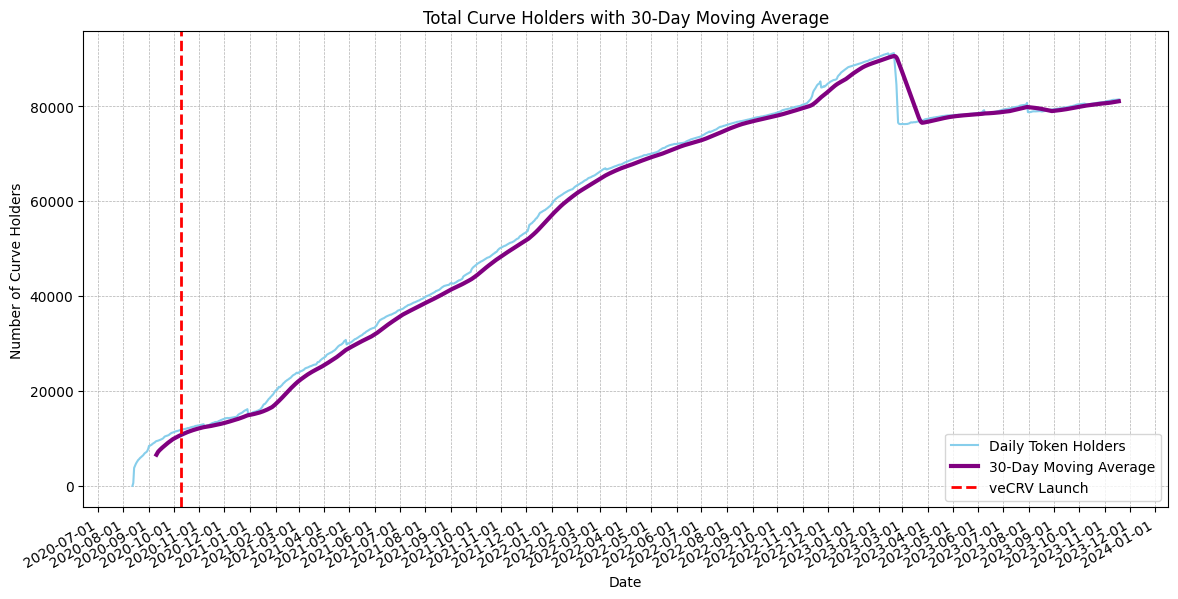

In [51]:
# Plotting the TVL with a highlighted date for veCRV launch and improved grid and labeling
plt.figure(figsize=(14, 7))
plt.plot(df_tokenholders.index, df_tokenholders['crv_token_holders'], label='Daily Token Holders', color='skyblue')
plt.plot(df_tokenholders.index, df_tokenholders['30D_MA'], label='30-Day Moving Average', color='purple', linewidth=3)

# Highlight the veCRV launch date
veCRV_launch_date = '2020-10-10'
plt.axvline(pd.to_datetime(veCRV_launch_date), color='red', linestyle='--', lw=2, label='veCRV Launch')

# Improve the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set major and minor ticks format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m'))

# Set major ticks locator
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Improve labels and title
plt.title('Total Curve Holders with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Curve Holders')

# Show legend
plt.legend()

# Show the plot with modifications
plt.show()

### TVL

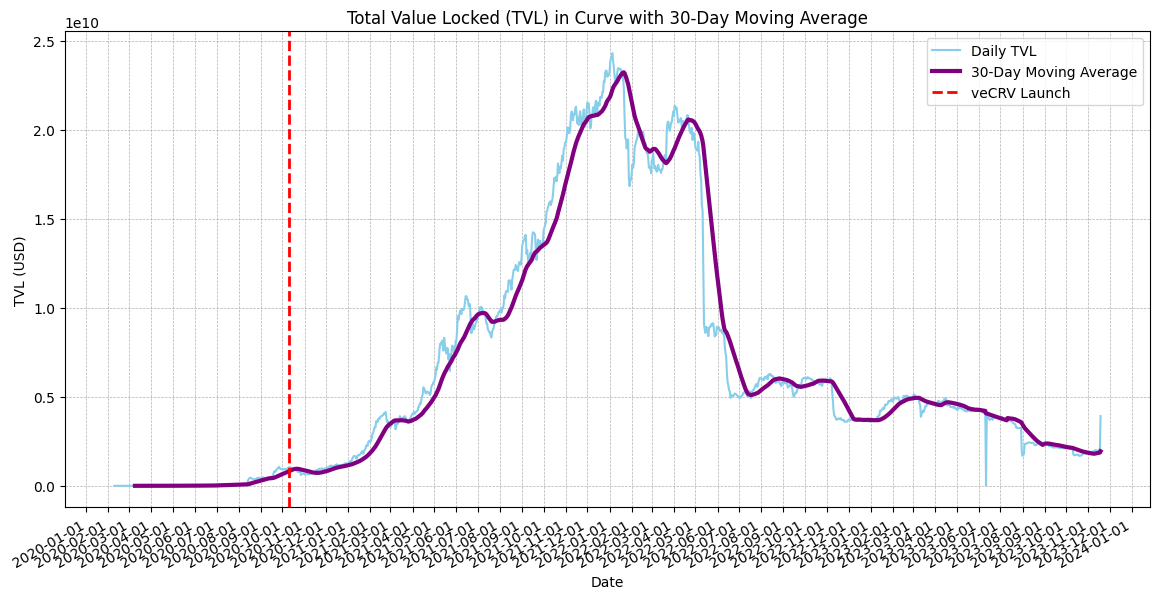

In [43]:
# Plotting the TVL with a highlighted date for veCRV launch and improved grid and labeling
plt.figure(figsize=(14, 7))
plt.plot(df_tvl.index, df_tvl['tvl'], label='Daily TVL', color='skyblue')
plt.plot(df_tvl.index, df_tvl['30D_MA'], label='30-Day Moving Average', color='purple', linewidth=3)

# Highlight the veCRV launch date
veCRV_launch_date = '2020-10-10'
plt.axvline(pd.to_datetime(veCRV_launch_date), color='red', linestyle='--', lw=2, label='veCRV Launch')

# Improve the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set major and minor ticks format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m'))

# Set major ticks locator
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Improve labels and title
plt.title('Total Value Locked (TVL) in Curve with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('TVL (USD)')

# Show legend
plt.legend()

# Show the plot with modifications
plt.show()

### Daily Price

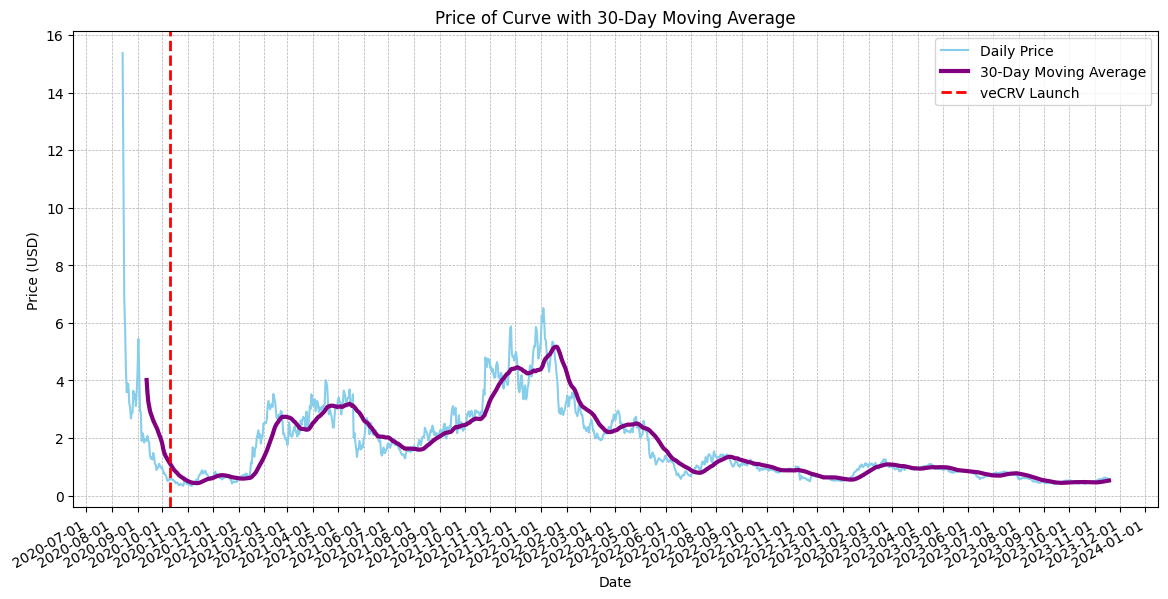

In [46]:
# Plotting the TVL with a highlighted date for veCRV launch and improved grid and labeling
plt.figure(figsize=(14, 7))
plt.plot(df_price.index, df_price['price'], label='Daily Price', color='skyblue')
plt.plot(df_price.index, df_price['30D_MA'], label='30-Day Moving Average', color='purple', linewidth=3)

# Highlight the veCRV launch date
veCRV_launch_date = '2020-10-10'
plt.axvline(pd.to_datetime(veCRV_launch_date), color='red', linestyle='--', lw=2, label='veCRV Launch')

# Improve the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set major and minor ticks format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m'))

# Set major ticks locator
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Improve labels and title
plt.title('Price of Curve with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Show legend
plt.legend()

# Show the plot with modifications
plt.show()

### Load trading volume data

In [89]:
# Load the dataset
file_path = 'token_terminal_data/daily_trading_volume_on_curve.csv'  # Replace with your file path
curve_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime and calculate percentage change
curve_data['Date'] = pd.to_datetime(curve_data['Date'])
curve_data['Percentage Change'] = curve_data['trading_volume'].pct_change() * 100

# Identifying the top three significant shifts
curve_data['Absolute Change'] = curve_data['Percentage Change'].abs()
top_shifts = curve_data.nlargest(3, 'Absolute Change')
significant_dates = top_shifts['Date'].dt.strftime('%Y-%m-%d').tolist()

top_shifts


,Date,trading_volume,Percentage Change,Absolute Change
1110,2023-11-14,2.539960e+09,1293.866560,1293.866560
836,2023-02-13,1.062897e+09,888.156201,888.156201
1017,2023-08-13,4.247321e+08,706.635529,706.635529


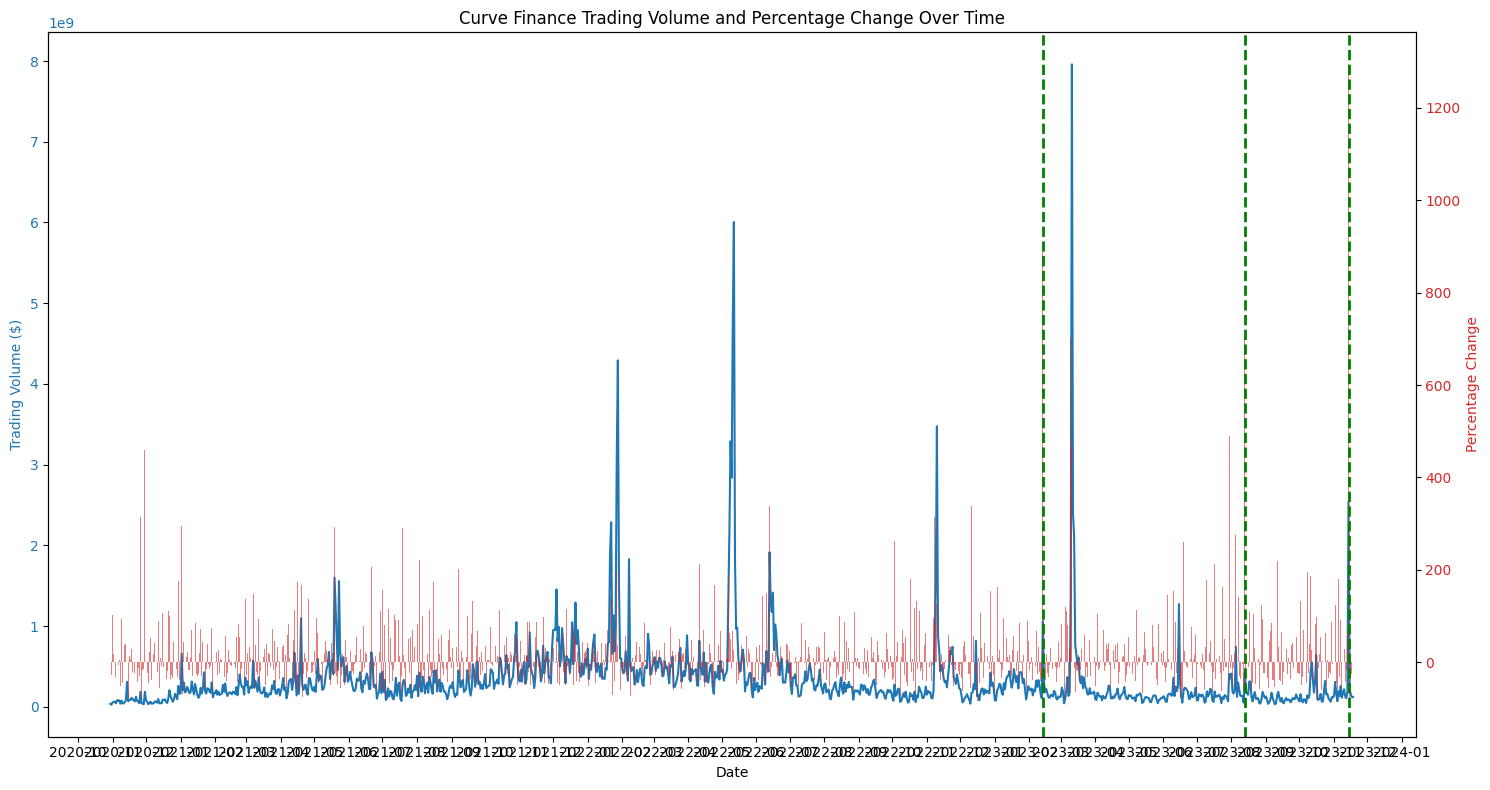

In [64]:
# Setting up the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting trading volume
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trading Volume ($)', color=color)
ax1.plot(curve_data['Date'], curve_data['trading_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for percentage change
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Percentage Change', color=color)  
ax2.bar(curve_data['Date'], curve_data['Percentage Change'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Highlighting the significant dates
for date in significant_dates:
    plt.axvline(pd.to_datetime(date), color='green', linestyle='--', lw=2)

# Formatting the x-axis to show dates clearly
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Adding title and legend
plt.title('Curve Finance Trading Volume and Percentage Change Over Time')
fig.tight_layout()  

# Show the plot
plt.show()

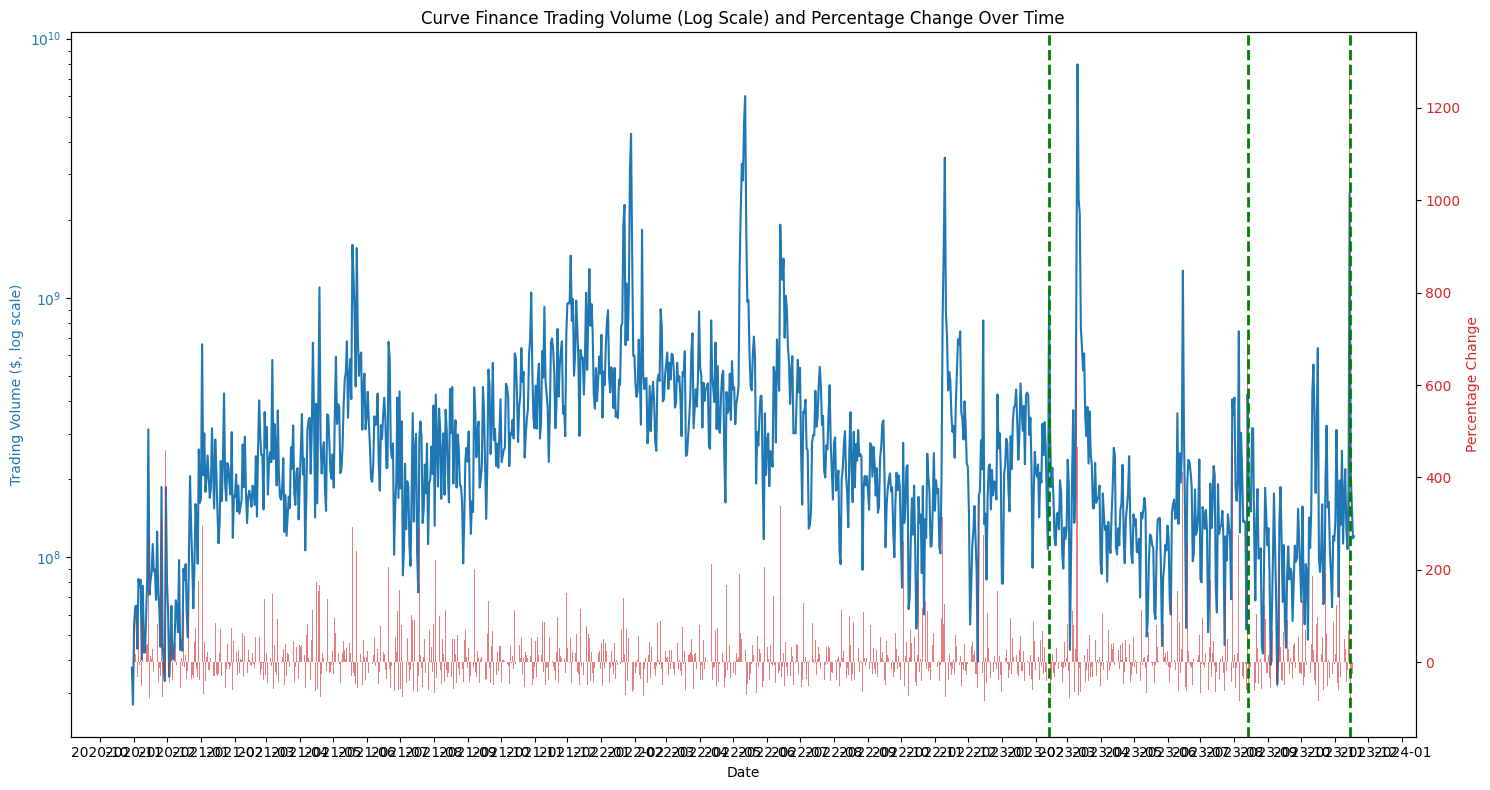

In [66]:
# Adjusting the plot to use a logarithmic scale for the trading volume
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting trading volume with a logarithmic scale
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trading Volume ($, log scale)', color=color)
ax1.plot(curve_data['Date'], curve_data['trading_volume'], color=color)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for percentage change
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Percentage Change', color=color)  
ax2.bar(curve_data['Date'], curve_data['Percentage Change'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Highlighting the significant dates
for date in significant_dates:
    plt.axvline(pd.to_datetime(date), color='green', linestyle='--', lw=2)

# Formatting the x-axis to show dates clearly
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

# Adding title and legend
plt.title('Curve Finance Trading Volume (Log Scale) and Percentage Change Over Time')
fig.tight_layout()  

# Show the plot
plt.show()

In [83]:
file_path = 'token_terminal_data/daily_trading_volume_on_curve.csv'  # Replace with your file path
curve_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
curve_data['Date'] = pd.to_datetime(curve_data['Date'])
curve_data.set_index('Date', inplace=True)

# Aggregate to weekly data and calculate 1-week moving average
weekly_data = curve_data.resample('W').sum()
weekly_data['1-Week MA Trading Volume'] = weekly_data['trading_volume']

# Calculate week-to-week percentage change in the 1-week moving average
weekly_data['MA Percentage Change'] = weekly_data['1-Week MA Trading Volume'].pct_change() * 100

# Identifying the top three weeks with the largest absolute percentage changes
top_weekly_shifts = weekly_data[['1-Week MA Trading Volume', 'MA Percentage Change']].abs().nlargest(5, 'MA Percentage Change')

In [86]:
# Extracting the significant dates
significant_dates = top_weekly_shifts.index.strftime('%Y-%m-%d').tolist()
significant_dates

['2023-03-12', '2022-11-13', '2020-11-08', '2022-05-15', '2023-10-15']

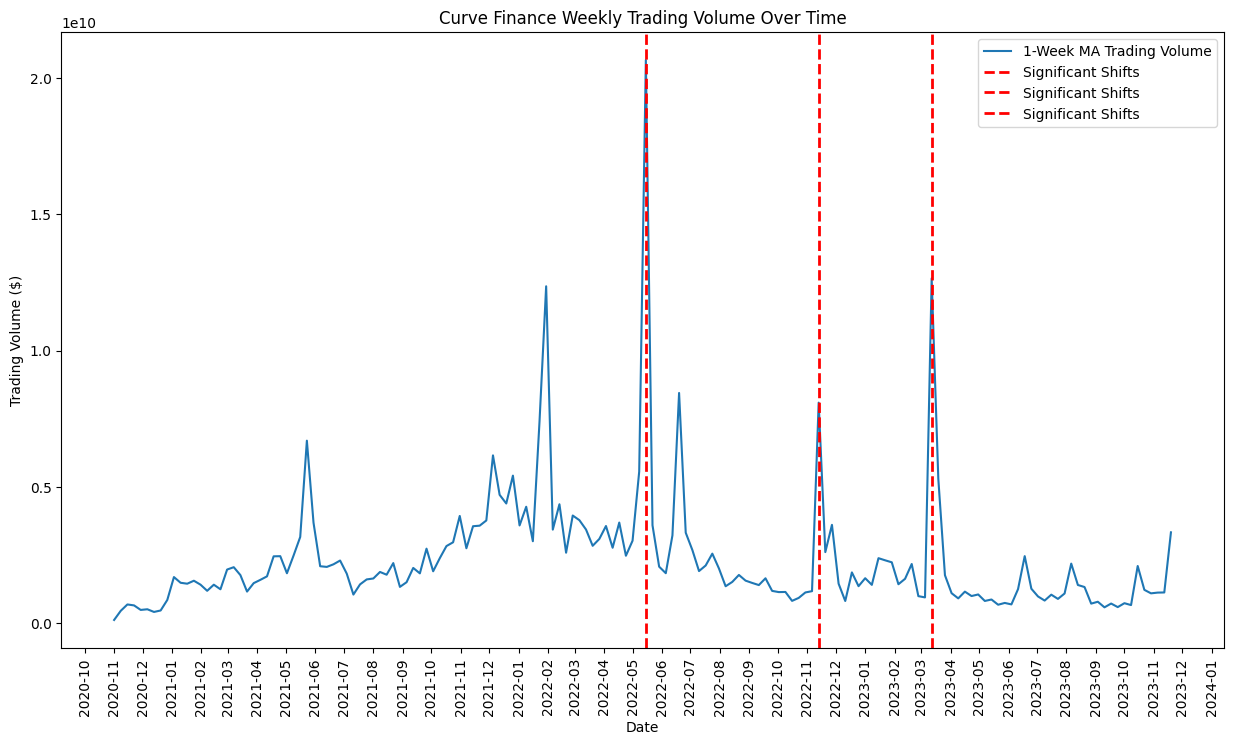

In [88]:
significant_dates = ['2023-03-12', '2022-11-13', '2022-05-15']

# Plotting the graph
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting the 1-week moving average of weekly trading volume
ax.plot(weekly_data.index, weekly_data['1-Week MA Trading Volume'], label='1-Week MA Trading Volume')

# Highlighting the significant dates
for date in significant_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', lw=2, label='Significant Shifts')

# Formatting the x-axis to show dates clearly
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Trading Volume ($)')
plt.title('Curve Finance Weekly Trading Volume Over Time')

# Adding a legend
plt.legend()

# Show the plot
plt.show()